# Reinforcement Learning Project

## Environment - Lunar Lander

**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. __Solved is 200 points__.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

- The lander crashes (the lander body gets in contact with the moon);

- The lander gets outside of the viewport (x coordinate is greater than 1);

- The lander is not awake.

**Version**
- V3

[More Information Here](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

## Libraries

In [10]:
import gymnasium as gym
import numpy as np
from typing import Callable, List, Optional
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy

from utils import *

## Environment

In [2]:
env = gym.make("LunarLander-v3")#, render_mode="human") 

/Users/antoniooliveira/Documents/GitHub/RL_project/venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


## Solving the Environment

### Random Agent

[LOG] Episode 1 - Reward: -114.47
[LOG] Episode 2 - Reward: -356.30
[LOG] Episode 3 - Reward: -452.22
[LOG] Episode 4 - Reward: -138.25
[LOG] Episode 5 - Reward: -136.90
[LOG] Episode 6 - Reward: -220.64
[LOG] Episode 7 - Reward: -190.34
[LOG] Episode 8 - Reward: -244.92
[LOG] Episode 9 - Reward: -377.58
[LOG] Episode 10 - Reward: -137.74
[LOG] Episode 11 - Reward: -125.13
[LOG] Episode 12 - Reward: -468.68
[LOG] Episode 13 - Reward: -159.79
[LOG] Episode 14 - Reward: -157.06
[LOG] Episode 15 - Reward: -71.31
[LOG] Episode 16 - Reward: -340.57
[LOG] Episode 17 - Reward: -59.81
[LOG] Episode 18 - Reward: -29.56
[LOG] Episode 19 - Reward: -6.66
[LOG] Episode 20 - Reward: -523.88
[LOG] Episode 21 - Reward: -104.65
[LOG] Episode 22 - Reward: -198.09
[LOG] Episode 23 - Reward: -174.39
[LOG] Episode 24 - Reward: -83.30
[LOG] Episode 25 - Reward: -221.05
[LOG] Episode 26 - Reward: -140.39
[LOG] Episode 27 - Reward: -97.81
[LOG] Episode 28 - Reward: -292.61
[LOG] Episode 29 - Reward: -121.53
[

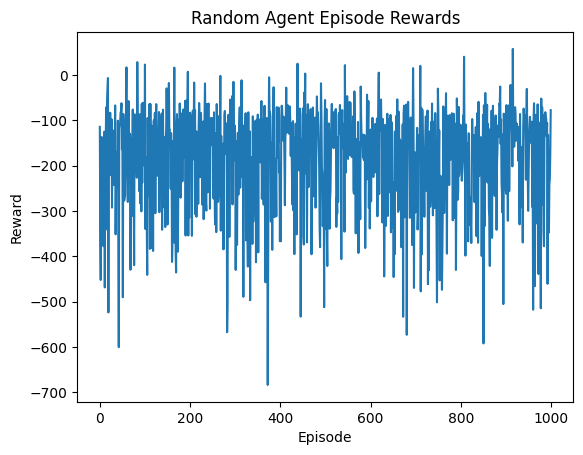

In [9]:
# render --> se quisermos ver a cena a funcionar
rewards = run_random_agent(episodes=1000, seed=42, log_fn=my_logger, render=False)

# Later you can plot:

plt.plot(rewards)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Rule-Based Agent

Episode 1 - Total Reward: -627.54
Episode 2 - Total Reward: -484.33
Episode 3 - Total Reward: -538.49
Episode 4 - Total Reward: -604.53
Episode 5 - Total Reward: -617.20
Episode 6 - Total Reward: -618.19
Episode 7 - Total Reward: -556.49
Episode 8 - Total Reward: -246.63
Episode 9 - Total Reward: -545.36
Episode 10 - Total Reward: -514.74
Episode 11 - Total Reward: -505.03
Episode 12 - Total Reward: -472.07
Episode 13 - Total Reward: -250.46
Episode 14 - Total Reward: -577.35
Episode 15 - Total Reward: -582.02
Episode 16 - Total Reward: -611.03
Episode 17 - Total Reward: -553.99
Episode 18 - Total Reward: -496.96
Episode 19 - Total Reward: -584.85
Episode 20 - Total Reward: -122.91
Episode 21 - Total Reward: -614.18
Episode 22 - Total Reward: -578.23
Episode 23 - Total Reward: -608.36
Episode 24 - Total Reward: -496.53
Episode 25 - Total Reward: -585.02
Episode 26 - Total Reward: -549.85
Episode 27 - Total Reward: -573.30
Episode 28 - Total Reward: -614.23
Episode 29 - Total Reward: -4

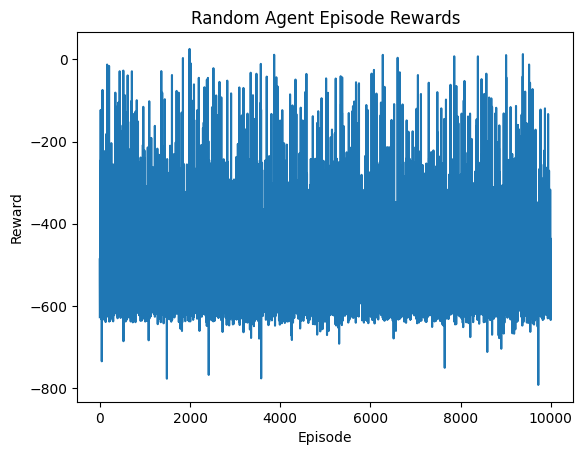

In [14]:
rewards = run_agent(episodes=10000, render=False, seed=1,
                    log_fn = None,
                    agent_fn=rule_based_action)

plt.plot(rewards)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### DQN

In [20]:
model = DQN("MlpPolicy", env, verbose=1, seed=42)

timestamps = 200_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | -208     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2124     |
|    time_elapsed     | 0        |
|    total_timesteps  | 378      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02     |
|    n_updates        | 69       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.8     |
|    ep_rew_mean      | -188     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1991     |
|    time_elapsed     | 0        |
|    total_timesteps  | 694      |
| train/              |        

In [21]:
episodes = 1000

rewards = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -157.56
Episode 2: Reward = -118.42
Episode 3: Reward = -145.55
Episode 4: Reward = -80.61
Episode 5: Reward = -105.88
Episode 6: Reward = -97.42
Episode 7: Reward = -140.86
Episode 8: Reward = -102.02
Episode 9: Reward = -127.30
Episode 10: Reward = -145.66
Episode 11: Reward = -57.31
Episode 12: Reward = -120.25
Episode 13: Reward = -78.47
Episode 14: Reward = -143.22
Episode 15: Reward = -63.51
Episode 16: Reward = -84.99
Episode 17: Reward = -106.40
Episode 18: Reward = -152.08
Episode 19: Reward = -38.07
Episode 20: Reward = -91.61
Episode 21: Reward = -100.58
Episode 22: Reward = -72.53
Episode 23: Reward = -116.87
Episode 24: Reward = -145.38
Episode 25: Reward = -124.71
Episode 26: Reward = -142.92
Episode 27: Reward = -109.99
Episode 28: Reward = -42.81
Episode 29: Reward = -136.44
Episode 30: Reward = -121.69
Episode 31: Reward = -99.63
Episode 32: Reward = -72.31
Episode 33: Reward = -148.27
Episode 34: Reward = -91.61
Episode 35: Reward = -64.06
Episode 

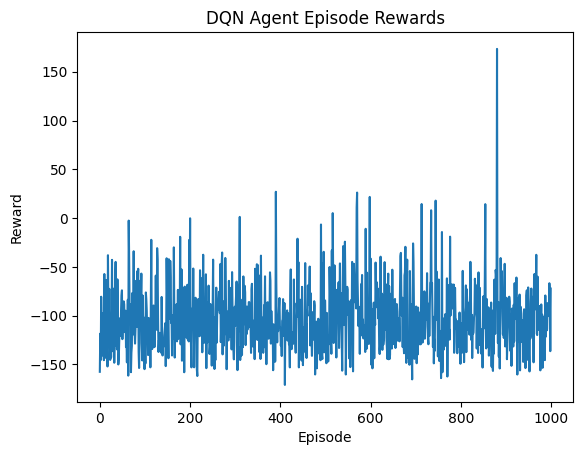

In [22]:
plt.plot(rewards)
plt.title("DQN Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [19]:
model.save(f"./models/lunar_lander/dqn_{timestamps}_after_{episodes}")
#loaded_model = DQN.load("./models/lunar_lander/dqn_{timestamps}_after_{episodes}", env=env)


### A2C

In [7]:
model = A2C("MlpPolicy", env, verbose=1, seed=42)

timestamps = 200_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 114      |
|    ep_rew_mean        | -225     |
| time/                 |          |
|    fps                | 850      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.34    |
|    explained_variance | -0.0237  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -6.58    |
|    value_loss         | 43       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 128      |
|    ep_rew_mean        | -258     |
| time/                 |          |
|    fps                | 960      |
|    iterations         | 200      |
|    time_elapsed 

In [8]:
episodes = 1000

rewards_a2c = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -201.18
Episode 2: Reward = -197.57
Episode 3: Reward = -238.86
Episode 4: Reward = -78.87
Episode 5: Reward = -214.62
Episode 6: Reward = -227.13
Episode 7: Reward = -117.17
Episode 8: Reward = -249.35
Episode 9: Reward = -195.17
Episode 10: Reward = -169.87
Episode 11: Reward = -139.41
Episode 12: Reward = -208.25
Episode 13: Reward = -237.25
Episode 14: Reward = -181.09
Episode 15: Reward = -131.87
Episode 16: Reward = -88.72
Episode 17: Reward = -156.17
Episode 18: Reward = -168.42
Episode 19: Reward = -190.14
Episode 20: Reward = -138.87
Episode 21: Reward = -222.73
Episode 22: Reward = -199.38
Episode 23: Reward = -209.35
Episode 24: Reward = -166.87
Episode 25: Reward = -100.91
Episode 26: Reward = -135.51
Episode 27: Reward = -222.20
Episode 28: Reward = -152.87
Episode 29: Reward = -205.72
Episode 30: Reward = -180.33
Episode 31: Reward = -182.12
Episode 32: Reward = -252.96
Episode 33: Reward = -230.08
Episode 34: Reward = -246.64
Episode 35: Reward = -92.

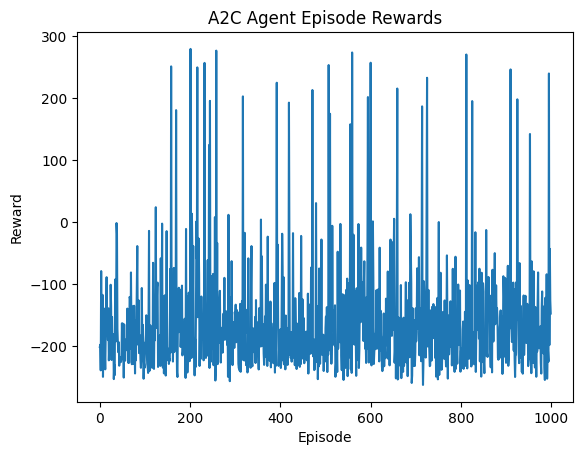

In [19]:
plt.plot(rewards_a2c)
plt.title("A2C Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### PPO

In [12]:
model = PPO("MlpPolicy", env, verbose=1, seed=42)

timestamps = 100_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.8     |
|    ep_rew_mean     | -190     |
| time/              |          |
|    fps             | 1889     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95          |
|    ep_rew_mean          | -168        |
| time/                   |             |
|    fps                  | 1415        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004195164 |
|    clip_fraction        | 0.00732     |
|    clip_range           | 0.2         |
|    entropy_loss   

In [13]:
episodes = 1000

rewards_ppo = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -90.54
Episode 2: Reward = -152.69
Episode 3: Reward = -121.50
Episode 4: Reward = -138.88
Episode 5: Reward = -125.91
Episode 6: Reward = -125.53
Episode 7: Reward = -135.21
Episode 8: Reward = -105.28
Episode 9: Reward = -87.78
Episode 10: Reward = -72.22
Episode 11: Reward = -44.05
Episode 12: Reward = -89.42
Episode 13: Reward = -98.04
Episode 14: Reward = -73.74
Episode 15: Reward = -111.88
Episode 16: Reward = -96.08
Episode 17: Reward = -86.79
Episode 18: Reward = -126.54
Episode 19: Reward = -100.25
Episode 20: Reward = -129.94
Episode 21: Reward = -81.09
Episode 22: Reward = -97.12
Episode 23: Reward = -62.90
Episode 24: Reward = -82.94
Episode 25: Reward = -116.55
Episode 26: Reward = -104.31
Episode 27: Reward = -146.09
Episode 28: Reward = -69.07
Episode 29: Reward = -100.66
Episode 30: Reward = -116.76
Episode 31: Reward = -91.56
Episode 32: Reward = -136.51
Episode 33: Reward = -89.36
Episode 34: Reward = -69.29
Episode 35: Reward = -120.73
Episode 36:

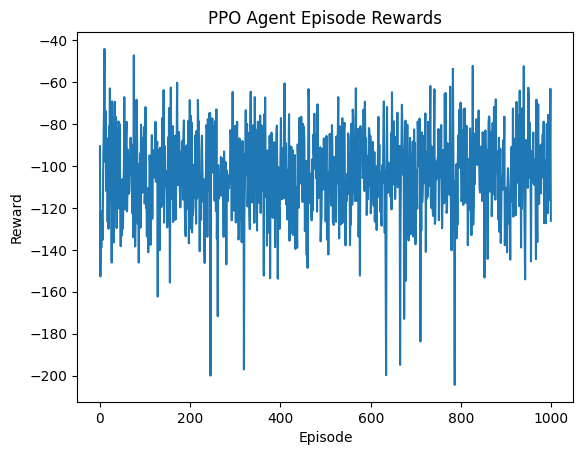

In [18]:
plt.plot(rewards_ppo)
plt.title("PPO Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Performance Comparison

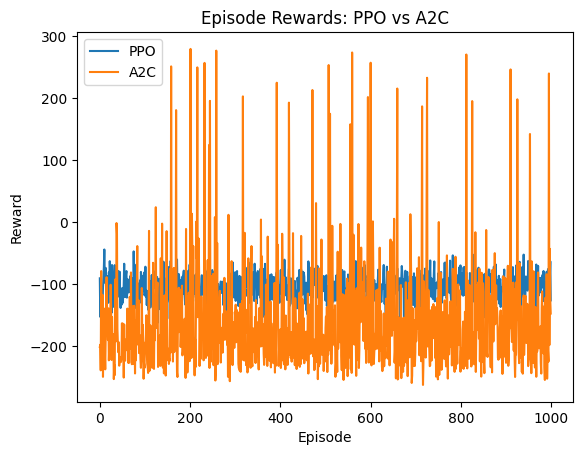

In [17]:
plt.plot(rewards_ppo, label="PPO")
plt.plot(rewards_a2c, label="A2C")
plt.title("Episode Rewards: PPO vs A2C")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()
